In [114]:
import os
os.chdir('C:\\Users\\davia\\Downloads\\AIMLCA1\\CA1\\Dataset')

In [115]:
import pandas as pd
df = pd.read_csv('CA1-Classification-Dataset.csv')

In [116]:
# Import pandas that allows us to view and manipulate data
import numpy as np
import pandas as pd

# Import datasets(s), and function that allows us to do train-test split
from sklearn.model_selection import train_test_split

# Import visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Import warnings and ignore if warnings are shown
import warnings
warnings.filterwarnings('ignore')

### 1. Data pre-processing

In [117]:
# Finding out the types of data in each column
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Clarity            float64
Quality              int64
dtype: object

It appears that all columns are of numerical values and therefore there is no need to convert any columns into dummy variables

<Axes: >

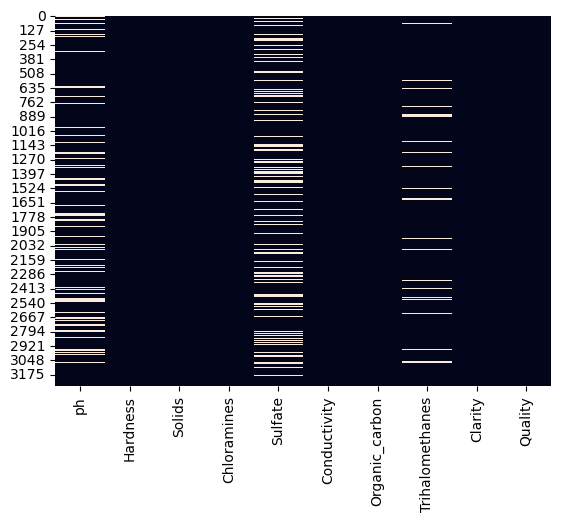

In [118]:
# Print out a heatmap to show how much missing data there is in the dataset
sns.heatmap(df.isnull(), cbar=False)

In [119]:
# See the count of the amount of missing data in the dataset
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Clarity              0
Quality              0
dtype: int64

In [120]:
# Printing the percentage of data missing in the Sulfate column
print(f"Percentage of Sulfate column missing: {round((df['Sulfate'].isnull().sum()/df.shape[0])*100, 3)}%")

Percentage of Sulfate column missing: 23.84%


Because only 23.8% of the column is missing, it would not be beneficial to drop the column. Instead I will just impute the data with the median value along with the other columns with missing values

#### 1.1 Creating a dataset without outliers

In [121]:
df_filtered = df.copy()

In [122]:
column_list = list(df_filtered.drop(['Quality'], axis=1))
print(column_list)
 
print("\nBefore dropping the outliers")
print(df_filtered.shape)
 
for i in column_list:
    Q1 = df_filtered[i].quantile(0.25)
    Q3 = df_filtered[i].quantile(0.75)
    IQR = Q3 - Q1
    df_filtered = df_filtered[(df_filtered[i] >= Q1 - 1.5 * IQR) & (df_filtered[i] <= Q3 + 1.5 * IQR) | df_filtered[i].isnull()]
 
print("\nAfter dropping the outliers")
print(df_filtered.shape)

['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Clarity']

Before dropping the outliers
(3276, 10)

After dropping the outliers
(2942, 10)


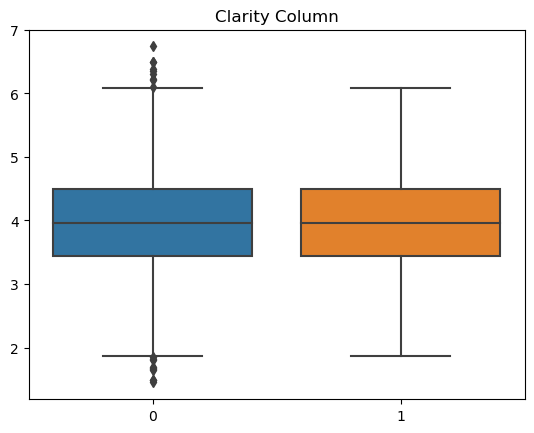

In [123]:
sns.boxplot([df['Clarity'], df_filtered['Clarity']])
plt.title("Clarity Column")
plt.show()

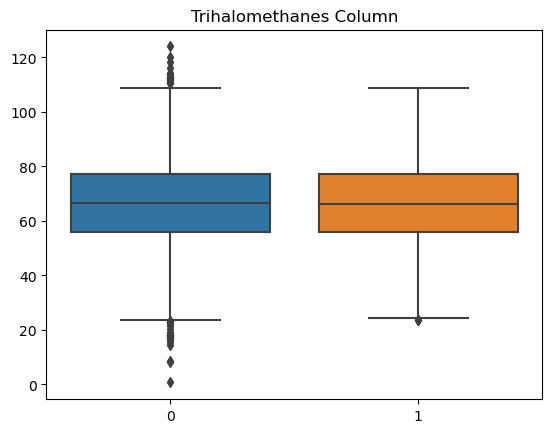

In [124]:
sns.boxplot([df['Trihalomethanes'], df_filtered['Trihalomethanes']])
plt.title("Trihalomethanes Column")
plt.show()

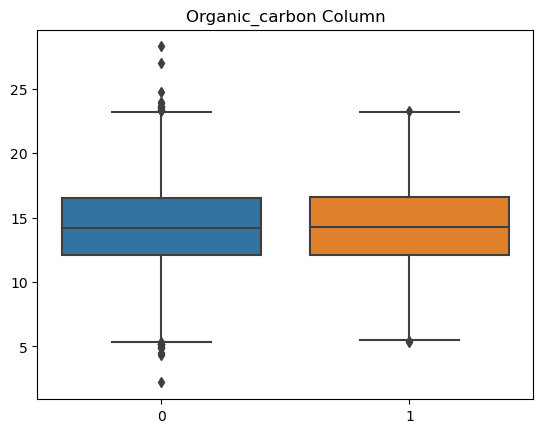

In [125]:
sns.boxplot([df['Organic_carbon'], df_filtered['Organic_carbon']])
plt.title("Organic_carbon Column")
plt.show()

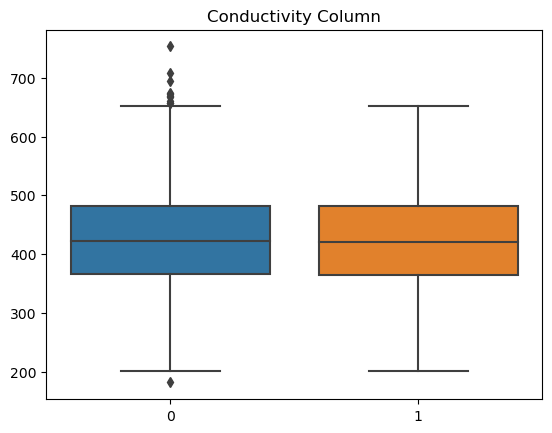

In [126]:
sns.boxplot([df['Conductivity'], df_filtered['Conductivity']])
plt.title("Conductivity Column")
plt.show()

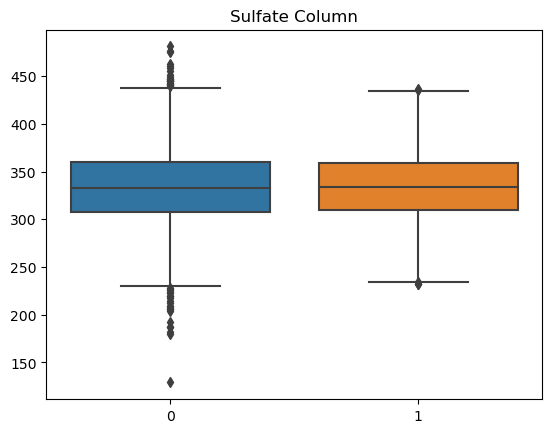

In [127]:
sns.boxplot([df['Sulfate'], df_filtered['Sulfate']])
plt.title("Sulfate Column")
plt.show()

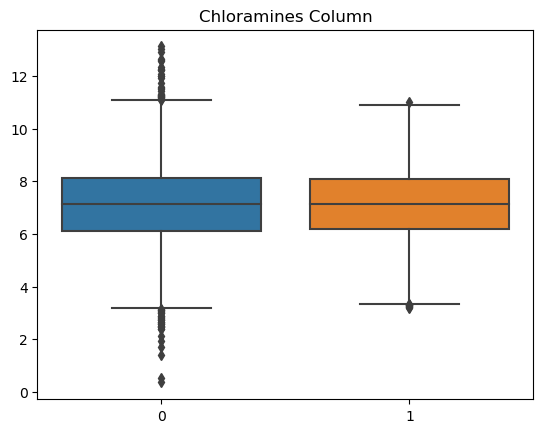

In [128]:
sns.boxplot([df['Chloramines'], df_filtered['Chloramines']])
plt.title("Chloramines Column")
plt.show()

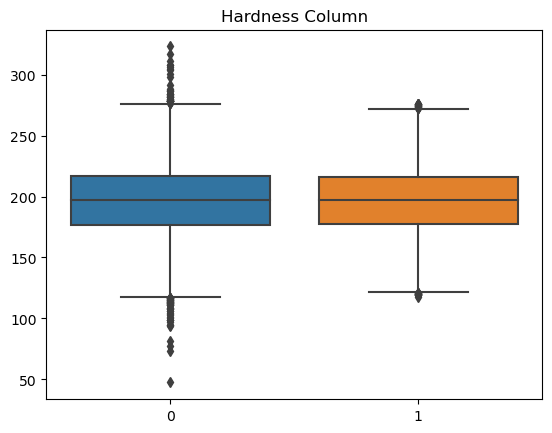

In [129]:
sns.boxplot([df['Hardness'], df_filtered['Hardness']])
plt.title("Hardness Column")
plt.show()

#### 1.2 Creating a dataset with outliers

In [130]:
df_unfiltered = df.copy()

#### Train test split

We want to train test split before imputing missing data values and scaling so that no information from the testing set leaks into the training set

<Axes: >

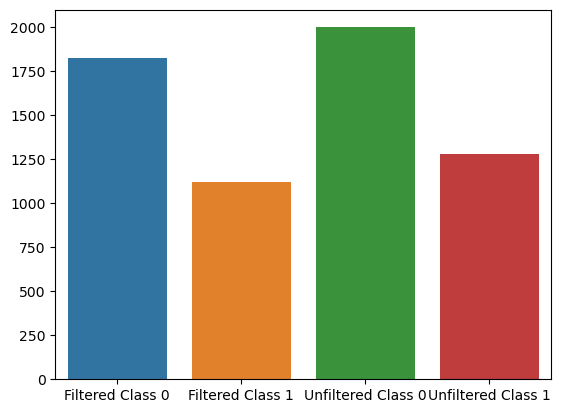

In [131]:
df_filtered_X = df_filtered.drop('Quality', axis=1)
df_filtered_y = df_filtered['Quality']

df_unfiltered_X = df_unfiltered.drop('Quality', axis=1)
df_unfiltered_y = df_unfiltered['Quality']

# Check class balance
df_filtered_y_one_count = df_filtered_y[df_filtered_y == 1].count()
df_filtered_y_zero_count = df_filtered_y[df_filtered_y == 0].count()

df_unfiltered_y_one_count = df_unfiltered_y[df_unfiltered_y == 1].count()
df_unfiltered_y_zero_count = df_unfiltered_y[df_unfiltered_y == 0].count()

sns.barplot(pd.DataFrame({"Filtered Class 0": [df_filtered_y_zero_count], "Filtered Class 1": [df_filtered_y_one_count], "Unfiltered Class 0": [df_unfiltered_y_zero_count], "Unfiltered Class 1": [df_unfiltered_y_one_count]}))

In [230]:
df_unfiltered_y_zero_count/(df_unfiltered_y_zero_count+df_filtered_y_one_count)*100

64.0795381654907

As you can see, there is a class imbalance and therefore, stratify is needed in train_test_split

In [132]:
X_train_unfiltered, X_test_unfiltered, y_train_unfiltered, y_test_unfiltered = train_test_split(df_unfiltered_X, df_unfiltered_y, test_size=0.2, random_state=42, stratify=df_unfiltered_y)
X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(df_filtered_X, df_filtered_y, test_size=0.2, random_state=42, stratify=df_filtered_y)

#### 1.3 Imputing Missing Data

<Axes: >

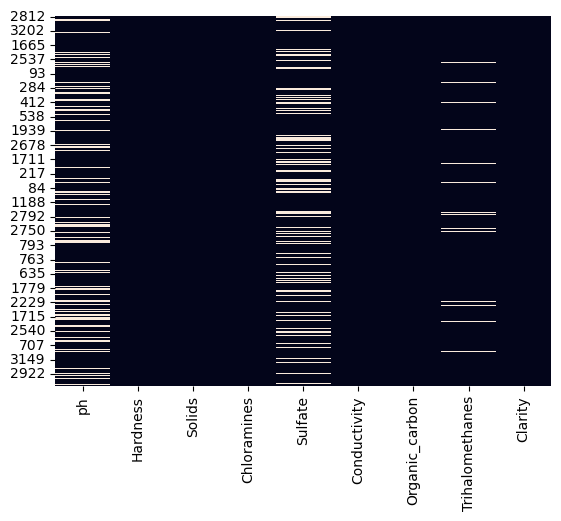

In [133]:
# Print out a heatmap to show how much missing data there is in the dataset
sns.heatmap(X_train_filtered.isnull(), cbar=False)

<Axes: >

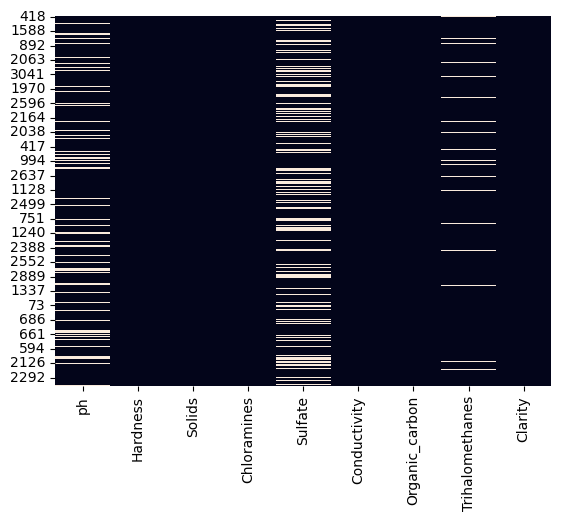

In [134]:
sns.heatmap(X_test_filtered.isnull(), cbar=False)

<Axes: >

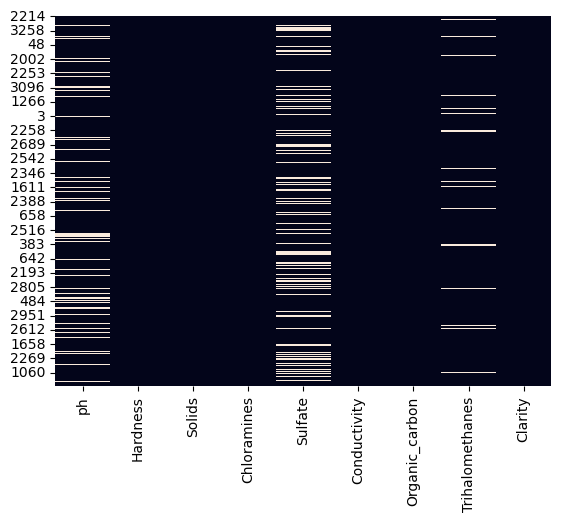

In [135]:
sns.heatmap(X_train_unfiltered.isnull(), cbar=False)

<Axes: >

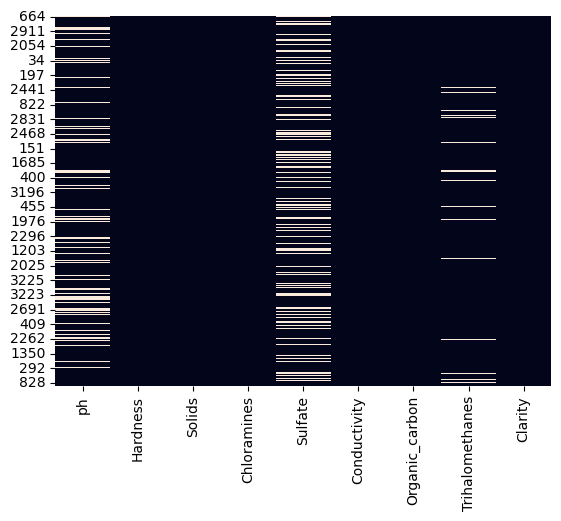

In [136]:
sns.heatmap(X_test_unfiltered.isnull(), cbar=False)

#### 1.3.1 Imputing Missing Data With Median For Unfiltered Data

In [137]:
# Impute Sulfate column with its median value
X_train_unfiltered['Sulfate'] = X_train_unfiltered['Sulfate'].fillna(X_train_unfiltered['Sulfate'].median())
X_test_unfiltered['Sulfate'] = X_test_unfiltered['Sulfate'].fillna(X_test_unfiltered['Sulfate'].median())

# Impute ph column with its median value
X_train_unfiltered['ph'] = X_train_unfiltered['ph'].fillna(X_train_unfiltered['ph'].median())
X_test_unfiltered['ph'] = X_test_unfiltered['ph'].fillna(X_test_unfiltered['ph'].median())

# Impute Trihalomethanes column with its median value
X_train_unfiltered['Trihalomethanes'] = X_train_unfiltered['Trihalomethanes'].fillna(X_train_unfiltered['Trihalomethanes'].median())
X_test_unfiltered['Trihalomethanes'] = X_test_unfiltered['Trihalomethanes'].fillna(X_test_unfiltered['Trihalomethanes'].median())

<Axes: >

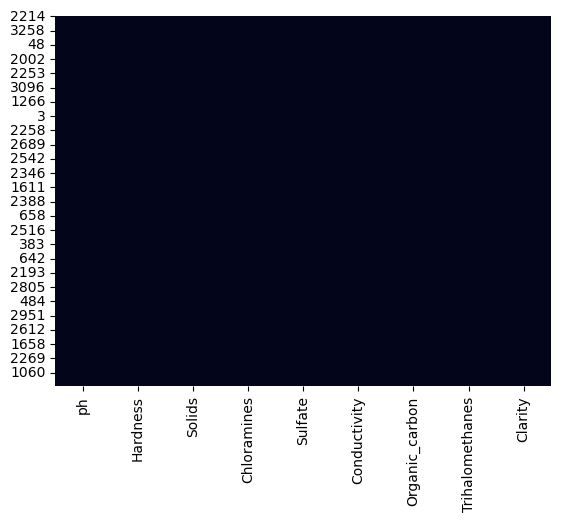

In [138]:
sns.heatmap(X_train_unfiltered.isnull(), cbar=False)

<Axes: >

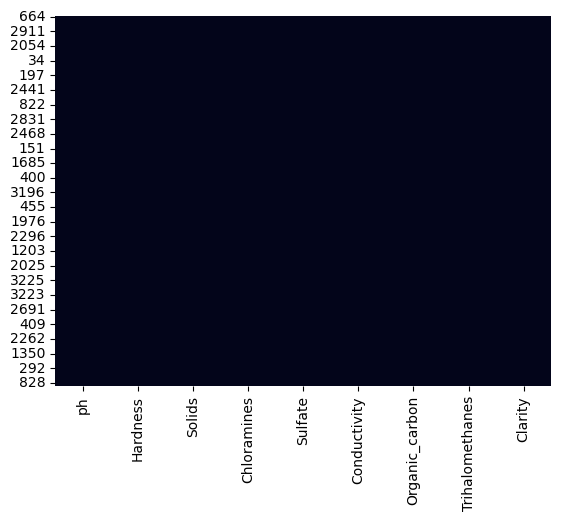

In [139]:
sns.heatmap(X_test_unfiltered.isnull(), cbar=False)

#### 1.3.2 Imputing Missing Data With Median For Filtered Data

In [140]:
# Impute Sulfate column with its median value
X_train_filtered['Sulfate'] = X_train_filtered['Sulfate'].fillna(X_train_filtered['Sulfate'].median())
X_test_filtered['Sulfate'] = X_test_filtered['Sulfate'].fillna(X_test_filtered['Sulfate'].median())

# Impute ph column with its median value
X_train_filtered['ph'] = X_train_filtered['ph'].fillna(X_train_filtered['ph'].median())
X_test_filtered['ph'] = X_test_filtered['ph'].fillna(X_test_filtered['ph'].median())

# Impute Trihalomethanes column with its median value
X_train_filtered['Trihalomethanes'] = X_train_filtered['Trihalomethanes'].fillna(X_train_filtered['Trihalomethanes'].median())
X_test_filtered['Trihalomethanes'] = X_test_filtered['Trihalomethanes'].fillna(X_test_filtered['Trihalomethanes'].median())

<Axes: >

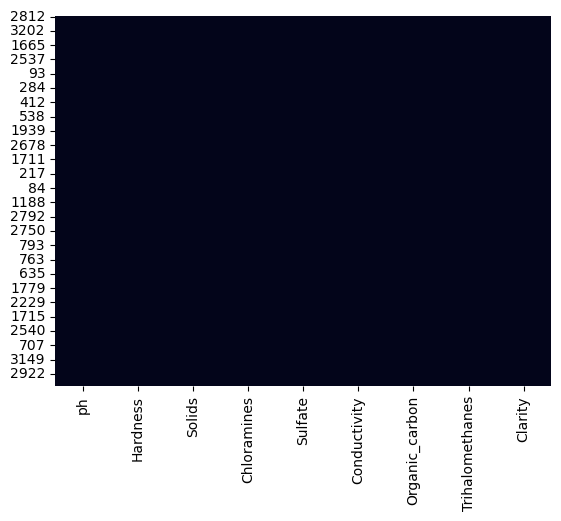

In [141]:
sns.heatmap(X_train_filtered.isnull(), cbar=False)

<Axes: >

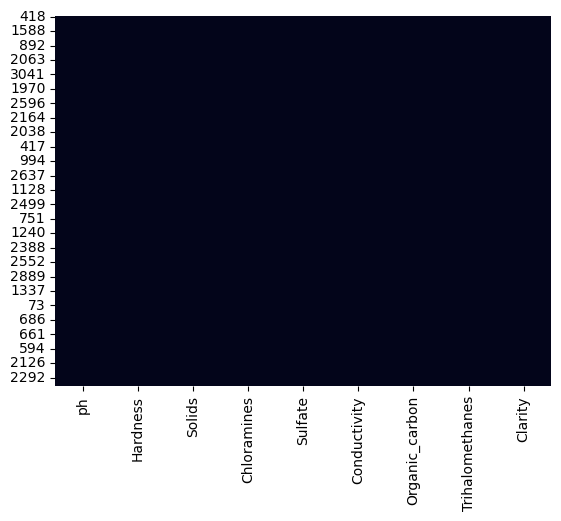

In [142]:
sns.heatmap(X_test_filtered.isnull(), cbar=False)

#### 1.4 Creating Scaled Data

In [143]:
# Import Standard Scaler to scale data
from sklearn.preprocessing import StandardScaler

#### 1.4.1 Unscaled Data For Unfiltered Data

In [144]:
# Train Data
X_train_unfiltered_unscaled = X_train_unfiltered.copy()
y_train_unfiltered_unscaled = y_train_unfiltered.copy()

# Test Data
X_test_unfiltered_unscaled = X_test_unfiltered.copy()
y_test_unfiltered_unscaled = y_test_unfiltered.copy()

#### 1.4.2 Scale Data For Unfiltered Data

In [145]:
scaler = StandardScaler()

# Train Data
X_train_unfiltered_scaled = scaler.fit_transform(X_train_unfiltered)
y_train_unfiltered_scaled = y_train_unfiltered

# Test Data
X_test_unfiltered_scaled = scaler.transform(X_test_unfiltered)
y_test_unfiltered_scaled = y_test_unfiltered

#### 1.4.3 Unscaled Data For Filtered Data

In [146]:
# Train Data
X_train_filtered_unscaled = X_train_filtered.copy()
y_train_filtered_unscaled = y_train_filtered.copy()

# Test Data
X_test_filtered_unscaled = X_test_filtered.copy()
y_test_filtered_unscaled = y_test_filtered.copy()

#### 1.4.4 Scale Data For Filtered Data

In [147]:
scaler = StandardScaler()

# Train Data
X_train_filtered_scaled = scaler.fit_transform(X_train_filtered)
y_train_filtered_scaled = y_train_filtered

# Test Data
X_test_filtered_scaled = scaler.transform(X_test_filtered)
y_test_filtered_scaled = y_test_filtered

We now have preprocessed and split our data. We can now move on to tuning the hyperparameters of the models

### 2. Tuning The Hyperparameters Of Different Models Before Comparing

We will be comparing the model using the F1 scoring to ensure that no models can get by just by predicting all '1' which can happen with accuracy scoring

In [148]:
# Importing cross_val_score for k-fold validation
from sklearn.model_selection import cross_val_score, KFold

# Importing GridSerachCV and RandomizedSearchCV
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#### 2.1 KNN Model

In [149]:
from sklearn.neighbors import KNeighborsClassifier

# Get the params in KNeighborsClassifier
KNeighborsClassifier().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [150]:
params = {"n_neighbors": np.arange(1,201)}

#### 2.1.1 KNN Model With Unfiltered Unscaled Data

In [151]:
# We use RandomizedSearchCV to find the best parameter for the logistic regression model
knn_model_unfiltered_unscaled = GridSearchCV(KNeighborsClassifier(), param_grid=params, cv=5, scoring='f1_weighted', n_jobs=-1)
knn_model_unfiltered_unscaled.fit(X_train_unfiltered_unscaled, y_train_unfiltered_unscaled)

print("Tuned KNN Unfiltered Unscaled Parameters: {}".format(knn_model_unfiltered_unscaled.best_params_))
print("Tuned KNN Unfiltered Unscaled Best F1 Score: {}".format(knn_model_unfiltered_unscaled.best_score_))

Tuned KNN Unfiltered Unscaled Parameters: {'n_neighbors': 3}
Tuned KNN Unfiltered Unscaled Best F1 Score: 0.5430420672877428


#### KNN Model With Unfiltered Scaled Data

In [152]:
# We use RandomizedSearchCV to find the best parameter for the logistic regression model
knn_model_unfiltered_scaled = GridSearchCV(KNeighborsClassifier(), param_grid=params, cv=5, scoring='f1_weighted', n_jobs=-1)
knn_model_unfiltered_scaled.fit(X_train_unfiltered_scaled, y_train_unfiltered_scaled)

print("Tuned KNN Unfiltered Scaled Parameters: {}".format(knn_model_unfiltered_scaled.best_params_))
print("Tuned KNN Unfiltered Scaled Best F1 Score: {}".format(knn_model_unfiltered_scaled.best_score_))

Tuned KNN Unfiltered Scaled Parameters: {'n_neighbors': 5}
Tuned KNN Unfiltered Scaled Best F1 Score: 0.6153874420829178


#### KNN Model With Filtered Unscaled Data

In [153]:
# We use RandomizedSearchCV to find the best parameter for the logistic regression model
knn_model_filtered_unscaled = GridSearchCV(KNeighborsClassifier(), param_grid=params, cv=5, scoring='f1_weighted', n_jobs=-1)
knn_model_filtered_unscaled.fit(X_train_filtered_unscaled, y_train_filtered_unscaled)

print("Tuned KNN Filtered Unscaled Parameters: {}".format(knn_model_filtered_unscaled.best_params_))
print("Tuned KNN Filtered Unscaled Best F1 Score: {}".format(knn_model_filtered_unscaled.best_score_))

Tuned KNN Filtered Unscaled Parameters: {'n_neighbors': 11}
Tuned KNN Filtered Unscaled Best F1 Score: 0.5563830334317832


#### KNN Model With Filtered Scaled Data

In [154]:
# We use RandomizedSearchCV to find the best parameter for the logistic regression model
knn_model_filtered_scaled = GridSearchCV(KNeighborsClassifier(), param_grid=params, cv=5, scoring='f1_weighted', n_jobs=-1)
knn_model_filtered_scaled.fit(X_train_filtered_scaled, y_train_filtered_scaled)

print("Tuned KNN Filtered Scaled Parameters: {}".format(knn_model_filtered_scaled.best_params_))
print("Tuned KNN Filtered Scaled Best F1 Score: {}".format(knn_model_filtered_scaled.best_score_))

Tuned KNN Filtered Scaled Parameters: {'n_neighbors': 7}
Tuned KNN Filtered Scaled Best F1 Score: 0.6130810271498534


### 2.2 Logistic Regression Model

In [155]:
from sklearn.linear_model import LogisticRegression

# Get the params in LogisticRegression
LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [156]:
params = {"penalty": ["l1", "l2"],
         "tol": np.linspace(0.0001, 1.0, 50),
         "C": np.linspace(0.1, 1, 50),
         "class_weight": ["balanced", {0:0.8, 1:0.2}]}

#### 2.2.1 Logistic Regression Model With Unfiltered Unscaled Data

In [157]:
# We use RandomizedSearchCV to find the best parameter for the logistic regression model
logistic_regression_model_unfiltered_unscaled = RandomizedSearchCV(LogisticRegression(), param_distributions=params, cv=5, scoring='f1_weighted', n_jobs=-1, n_iter=1000)
logistic_regression_model_unfiltered_unscaled.fit(X_train_unfiltered_unscaled, y_train_unfiltered_unscaled)

print("Tuned Logistic Regression Unfiltered Unscaled Parameters: {}".format(logistic_regression_model_unfiltered_unscaled.best_params_))
print("Tuned Logistic Regression Unfiltered Unscaled Best F1 Score: {}".format(logistic_regression_model_unfiltered_unscaled.best_score_))

Tuned Logistic Regression Unfiltered Unscaled Parameters: {'tol': 0.0001, 'penalty': 'l2', 'class_weight': 'balanced', 'C': 0.1}
Tuned Logistic Regression Unfiltered Unscaled Best F1 Score: 0.500207281351138


#### 2.2.2 Logistic Regression Model With Unfiltered Scaled Data

In [158]:
# We use RandomizedSearchCV to find the best parameter for the logistic regression model
logistic_regression_model_unfiltered_scaled = RandomizedSearchCV(LogisticRegression(), param_distributions=params, cv=5, scoring='f1_weighted', n_jobs=-1, n_iter=1000)
logistic_regression_model_unfiltered_scaled.fit(X_train_unfiltered_scaled, y_train_unfiltered_scaled)

print("Tuned Logistic Regression Unfiltered Scaled Parameters: {}".format(logistic_regression_model_unfiltered_scaled.best_params_))
print("Tuned Logistic Regression Unfil  tered Scaled Best F1 Score: {}".format(logistic_regression_model_unfiltered_scaled.best_score_))

Tuned Logistic Regression Unfiltered Scaled Parameters: {'tol': 0.5102530612244898, 'penalty': 'l2', 'class_weight': 'balanced', 'C': 0.6510204081632653}
Tuned Logistic Regression Unfil  tered Scaled Best F1 Score: 0.4903247070747449


#### 2.2.3 Logistic Regression Model With Filtered Unscaled Data

In [159]:
# We use RandomizedSearchCV to find the best parameter for the logistic regression model
logistic_regression_model_filtered_unscaled = RandomizedSearchCV(LogisticRegression(), param_distributions=params, cv=5, scoring='f1_weighted', n_jobs=-1, n_iter=1000)
logistic_regression_model_filtered_unscaled.fit(X_train_filtered_unscaled, y_train_filtered_unscaled)

print("Tuned Logistic Regression Filtered Unscaled Parameters: {}".format(logistic_regression_model_filtered_unscaled.best_params_))
print("Tuned Logistic Regression Filtered Unscaled Best F1 Score: {}".format(logistic_regression_model_filtered_unscaled.best_score_))

Tuned Logistic Regression Filtered Unscaled Parameters: {'tol': 0.8163448979591836, 'penalty': 'l2', 'class_weight': 'balanced', 'C': 0.11836734693877551}
Tuned Logistic Regression Filtered Unscaled Best F1 Score: 0.5237116994890985


#### 2.2.4 Logistic Regression Model With Filtered Scaled Data

In [160]:
# We use RandomizedSearchCV to find the best parameter for the logistic regression model
logistic_regression_model_filtered_scaled = RandomizedSearchCV(LogisticRegression(), param_distributions=params, cv=5, scoring='f1_weighted', n_jobs=-1, n_iter=1000)
logistic_regression_model_filtered_scaled.fit(X_train_filtered_scaled, y_train_filtered_scaled)

print("Tuned Logistic Regression Filtered Scaled Parameters: {}".format(logistic_regression_model_filtered_scaled.best_params_))
print("Tuned Logistic Regression Filtered Scaled Best F1 Score: {}".format(logistic_regression_model_filtered_scaled.best_score_))

Tuned Logistic Regression Filtered Scaled Parameters: {'tol': 0.4898469387755102, 'penalty': 'l2', 'class_weight': 'balanced', 'C': 0.9081632653061225}
Tuned Logistic Regression Filtered Scaled Best F1 Score: 0.5074440333949879


### 2.3 Naïve Bayes Classifier Model

In [161]:
from sklearn.naive_bayes import GaussianNB

# Get the params in GaussianNB
GaussianNB().get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [162]:
params = {'var_smoothing': np.logspace(0,-9, num=100), 'priors': [None, [0.3, 0.7], [0.5, 0.5]]}

#### 2.3.1 Naïve Bayes Classifier Model With Unfiltered Unscaled Data

In [163]:
params = {'var_smoothing': np.logspace(0,-9, num=100), 'priors': [None, [0.3, 0.7], [0.5, 0.5]]}

nb_model_unfiltered_unscaled = GridSearchCV(GaussianNB(), param_grid=params, cv=5, n_jobs=-1, scoring='f1_weighted')
nb_model_unfiltered_unscaled.fit(X_train_unfiltered_unscaled, y_train_unfiltered_unscaled)

print("Tuned Naïve Bayes Classifier Unfiltered Unscaled Parameters: {}".format(nb_model_unfiltered_unscaled.best_params_))
print("Tuned Naïve Bayes Classifier Unfiltered Unscaled Best F1 Score: {}".format(nb_model_unfiltered_unscaled.best_score_))

Tuned Naïve Bayes Classifier Unfiltered Unscaled Parameters: {'priors': [0.5, 0.5], 'var_smoothing': 8.111308307896872e-07}
Tuned Naïve Bayes Classifier Unfiltered Unscaled Best F1 Score: 0.6011359076241721


#### 2.3.2 Naïve Bayes Classifier Model With Unfiltered Scaled Data

In [164]:
params = {'var_smoothing': np.logspace(0,-9, num=100), 'priors': [None, [0.3, 0.7], [0.5, 0.5]]}

nb_model_unfiltered_scaled = GridSearchCV(GaussianNB(), param_grid=params, cv=5, n_jobs=-1, scoring='f1_weighted')
nb_model_unfiltered_scaled.fit(X_train_unfiltered_scaled, y_train_unfiltered_scaled)

print("Tuned Naïve Bayes Classifier Unfiltered Scaled Parameters: {}".format(nb_model_unfiltered_scaled.best_params_))
print("Tuned Naïve Bayes Classifier Unfiltered Scaled Best F1 Score: {}".format(nb_model_unfiltered_scaled.best_score_))

Tuned Naïve Bayes Classifier Unfiltered Scaled Parameters: {'priors': [0.5, 0.5], 'var_smoothing': 0.2848035868435802}
Tuned Naïve Bayes Classifier Unfiltered Scaled Best F1 Score: 0.5914266545224249


#### 2.3.3 Naïve Bayes Classifier Model With Filtered Unscaled Data

In [165]:
params = {'var_smoothing': np.logspace(0,-9, num=100), 'priors': [None, [0.3, 0.7], [0.5, 0.5]]}

nb_model_filtered_unscaled = GridSearchCV(GaussianNB(), param_grid=params, cv=5, n_jobs=-1, scoring='f1_weighted')
nb_model_filtered_unscaled.fit(X_train_filtered_unscaled, y_train_filtered_unscaled)

print("Tuned Naïve Bayes Classifier Filtered Unscaled Parameters: {}".format(nb_model_filtered_unscaled.best_params_))
print("Tuned Naïve Bayes Classifier Filtered Unscaled Best F1 Score: {}".format(nb_model_filtered_unscaled.best_score_))

Tuned Naïve Bayes Classifier Filtered Unscaled Parameters: {'priors': [0.5, 0.5], 'var_smoothing': 1.232846739442066e-06}
Tuned Naïve Bayes Classifier Filtered Unscaled Best F1 Score: 0.5913093268023429


#### 2.3.4 Naïve Bayes Classifier Model With Filtered Scaled Data

In [166]:
params = {'var_smoothing': np.logspace(0,-9, num=100), 'priors': [None, [0.3, 0.7], [0.5, 0.5]]}

nb_model_filtered_scaled = GridSearchCV(GaussianNB(), param_grid=params, cv=5, n_jobs=-1, scoring='f1_weighted')
nb_model_filtered_scaled.fit(X_train_filtered_scaled, y_train_filtered_scaled)

print("Tuned Naïve Bayes Classifier Filtered Scaled Parameters: {}".format(nb_model_filtered_scaled.best_params_))
print("Tuned Naïve Bayes Classifier Filtered Scaled Best F1 Score: {}".format(nb_model_filtered_scaled.best_score_))

Tuned Naïve Bayes Classifier Filtered Scaled Parameters: {'priors': [0.5, 0.5], 'var_smoothing': 0.1}
Tuned Naïve Bayes Classifier Filtered Scaled Best F1 Score: 0.5760088444159425


### 2.4 Decision Tree Classifier Model

In [167]:
from sklearn.tree import DecisionTreeClassifier

# Get the params in DecisionTreeClassifier
DecisionTreeClassifier().get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [168]:
param_grid = {
    'max_depth': np.concatenate((np.arange(0,12,1), [None])),
    'min_samples_split': np.arange(0,8,1),
    'min_samples_leaf': np.arange(0,12,1),
    'max_features': ['sqrt', 'log2', None]
}

#### 2.4.1 Decision Tree Classifer Model With Unfiltered Unscaled Data

In [169]:
decision_tree_model_unfiltered_unscaled = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, cv=5, n_jobs=-1, scoring='f1_weighted')
decision_tree_model_unfiltered_unscaled.fit(X_train_unfiltered_unscaled, y_train_unfiltered_unscaled)

print("Tuned Decision Tree Classifier Unfiltered Unscaled Parameters: {}".format(decision_tree_model_unfiltered_unscaled.best_params_))
print("Tuned Decision Tree Classifier Unfiltered Unscaled Best F1 Score: {}".format(decision_tree_model_unfiltered_unscaled.best_score_))

Tuned Decision Tree Classifier Unfiltered Unscaled Parameters: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 5}
Tuned Decision Tree Classifier Unfiltered Unscaled Best F1 Score: 0.614428135207079


#### 2.4.2 Decision Tree Classifer Model With Unfiltered Scaled Data

In [170]:
decision_tree_model_unfiltered_scaled = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, cv=5, n_jobs=-1, scoring='f1_weighted')
decision_tree_model_unfiltered_scaled.fit(X_train_unfiltered_scaled, y_train_unfiltered_scaled)

print("Tuned Decision Tree Classifier Unfiltered Scaled Parameters: {}".format(decision_tree_model_unfiltered_scaled.best_params_))
print("Tuned Decision Tree Classifier Unfiltered Scaled Best F1 Score: {}".format(decision_tree_model_unfiltered_scaled.best_score_))

Tuned Decision Tree Classifier Unfiltered Scaled Parameters: {'max_depth': 11, 'max_features': 'log2', 'min_samples_leaf': 7, 'min_samples_split': 5}
Tuned Decision Tree Classifier Unfiltered Scaled Best F1 Score: 0.616637290564779


#### 2.4.3 Decision Tree Classifer Model With Filtered Unscaled Data

In [171]:
decision_tree_model_filtered_unscaled = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, cv=5, n_jobs=-1, scoring='f1_weighted')
decision_tree_model_filtered_unscaled.fit(X_train_filtered_unscaled, y_train_filtered_unscaled)

print("Tuned Decision Tree Classifier Filtered Unscaled Parameters: {}".format(decision_tree_model_filtered_unscaled.best_params_))
print("Tuned Decision Tree Classifier Filtered Unscaled Best F1 Score: {}".format(decision_tree_model_filtered_unscaled.best_score_))

Tuned Decision Tree Classifier Filtered Unscaled Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 9, 'min_samples_split': 6}
Tuned Decision Tree Classifier Filtered Unscaled Best F1 Score: 0.6132813929614136


#### 2.4.4 Decision Tree Classifer Model With Filtered Scaled Data

In [172]:
decision_tree_model_filtered_scaled = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, cv=5, n_jobs=-1, scoring='f1_weighted')
decision_tree_model_filtered_scaled.fit(X_train_filtered_scaled, y_train_filtered_scaled)

print("Tuned Decision Tree Classifier Filtered Scaled Parameters: {}".format(decision_tree_model_filtered_scaled.best_params_))
print("Tuned Decision Tree Classifier Filtered Scaled Best F1 Score: {}".format(decision_tree_model_filtered_scaled.best_score_))

Tuned Decision Tree Classifier Filtered Scaled Parameters: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 7, 'min_samples_split': 5}
Tuned Decision Tree Classifier Filtered Scaled Best F1 Score: 0.6152934061941112


### 2.5 Random Forest Classifer Model

In [173]:
from sklearn.ensemble import RandomForestClassifier

# Get the params in RandomForestClassifier
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [174]:
param_grid = {
    'max_depth': np.concatenate((np.arange(0,12,1), [None])),
    'min_samples_split': np.arange(0,8,1),
    'min_samples_leaf': np.arange(0,12,1),
    'max_features': ['sqrt', 'log2', None]
}

#### 2.5.1 Random Forest Classifier With Unfiltered Unscaled Data

In [175]:
random_forest_model_unfiltered_unscaled = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_grid, cv=5, n_jobs=-1, scoring='f1_weighted', n_iter=300)
random_forest_model_unfiltered_unscaled.fit(X_train_unfiltered_unscaled, y_train_unfiltered_unscaled)

print("Tuned Random Forest Classifier Unfiltered Unscaled Parameters: {}".format(random_forest_model_unfiltered_unscaled.best_params_))
print("Tuned Random Forest Classifier Unfiltered Unscaled Best F1 Score: {}".format(random_forest_model_unfiltered_unscaled.best_score_))

Tuned Random Forest Classifier Unfiltered Unscaled Parameters: {'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': None}
Tuned Random Forest Classifier Unfiltered Unscaled Best F1 Score: 0.6481329631474992


#### 2.5.2 Random Forest Classifier With Unfiltered Scaled Data

In [176]:
random_forest_model_unfiltered_scaled = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_grid, cv=5, n_jobs=-1, scoring='f1_weighted', n_iter=300)
random_forest_model_unfiltered_scaled.fit(X_train_unfiltered_scaled, y_train_unfiltered_scaled)

print("Tuned Random Forest Classifier Unfiltered Scaled Parameters: {}".format(random_forest_model_unfiltered_scaled.best_params_))
print("Tuned Random Forest Classifier Unfiltered Scaled Best F1 Score: {}".format(random_forest_model_unfiltered_scaled.best_score_))

Tuned Random Forest Classifier Unfiltered Scaled Parameters: {'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': None}
Tuned Random Forest Classifier Unfiltered Scaled Best F1 Score: 0.6495840117828416


#### 2.5.3 Random Forest Classifier With Filtered Unscaled Data

In [177]:
random_forest_model_filtered_unscaled = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_grid, cv=5, n_jobs=-1, scoring='f1_weighted', n_iter=300)
random_forest_model_filtered_unscaled.fit(X_train_filtered_unscaled, y_train_filtered_unscaled)

print("Tuned Random Forest Classifier Filtered Unscaled Parameters: {}".format(random_forest_model_filtered_unscaled.best_params_))
print("Tuned Random Forest Classifier Filtered Unscaled Best F1 Score: {}".format(random_forest_model_filtered_unscaled.best_score_))

Tuned Random Forest Classifier Filtered Unscaled Parameters: {'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': None}
Tuned Random Forest Classifier Filtered Unscaled Best F1 Score: 0.6389854418866613


#### 2.5.4 Random Forest Classifier With Filtered Scaled Data

In [178]:
random_forest_model_filtered_scaled = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_grid, cv=5, n_jobs=-1, scoring='f1_weighted', n_iter=300)
random_forest_model_filtered_scaled.fit(X_train_filtered_scaled, y_train_filtered_scaled)

print("Tuned Random Forest Classifier Filtered Scaled Parameters: {}".format(random_forest_model_filtered_scaled.best_params_))
print("Tuned Random Forest Classifier Filtered Scaled Best F1 Score: {}".format(random_forest_model_filtered_scaled.best_score_))

Tuned Random Forest Classifier Filtered Scaled Parameters: {'min_samples_split': 7, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': None}
Tuned Random Forest Classifier Filtered Scaled Best F1 Score: 0.6364033900614847


### 2.6 Support Vector Classifier Model

In [179]:
from sklearn.svm import SVC

# Get the params in SVC
SVC().get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [180]:
param_grid = {
    'C': np.linspace(0.01, 5, 100),
    'gamma': np.linspace(0.01, 1, 200)
}

#### 2.6.1 Support Vector Classifer Model With Unfiltered Unscaled Data

In [181]:
svc_model_unfiltered_unscaled = RandomizedSearchCV(SVC(), param_distributions=param_grid, cv=5, n_jobs=-1, scoring='f1_weighted', n_iter=30)
svc_model_unfiltered_unscaled.fit(X_train_unfiltered_unscaled, y_train_unfiltered_unscaled)

print("Tuned Support Vector Classifier Unfiltered Unscaled Parameters: {}".format(svc_model_unfiltered_unscaled.best_params_))
print("Tuned Support Vector Classifier Unfiltered Unscaled Best F1 Score: {}".format(svc_model_unfiltered_unscaled.best_score_))

Tuned Support Vector Classifier Unfiltered Unscaled Parameters: {'gamma': 0.22391959798994976, 'C': 1.4213131313131315}
Tuned Support Vector Classifier Unfiltered Unscaled Best F1 Score: 0.46214267379981167


#### 2.6.2 Support Vector Classifer Model With Unfiltered Scaled Data

In [182]:
svc_model_unfiltered_scaled = RandomizedSearchCV(SVC(), param_distributions=param_grid, cv=5, n_jobs=-1, scoring='f1_weighted', n_iter=30)
svc_model_unfiltered_scaled.fit(X_train_unfiltered_scaled, y_train_unfiltered_scaled)

print("Tuned Support Vector Classifier Unfiltered Scaled Parameters: {}".format(svc_model_unfiltered_scaled.best_params_))
print("Tuned Support Vector Classifier Unfiltered Scaled Best F1 Score: {}".format(svc_model_unfiltered_scaled.best_score_))

Tuned Support Vector Classifier Unfiltered Scaled Parameters: {'gamma': 0.16422110552763822, 'C': 3.5382828282828283}
Tuned Support Vector Classifier Unfiltered Scaled Best F1 Score: 0.6590186031363595


#### 2.6.3 Support Vector Classifer Model With Filtered Unscaled Data

In [183]:
svc_model_filtered_unscaled = RandomizedSearchCV(SVC(), param_distributions=param_grid, cv=5, n_jobs=-1, scoring='f1_weighted', n_iter=30)
svc_model_filtered_unscaled.fit(X_train_filtered_unscaled, y_train_filtered_unscaled)

print("Tuned Support Vector Classifier Filtered Unscaled Parameters: {}".format(svc_model_filtered_unscaled.best_params_))
print("Tuned Support Vector Classifier Filtered Unscaled Best F1 Score: {}".format(svc_model_filtered_unscaled.best_score_))

Tuned Support Vector Classifier Filtered Unscaled Parameters: {'gamma': 0.4826130653266332, 'C': 1.7741414141414142}
Tuned Support Vector Classifier Filtered Unscaled Best F1 Score: 0.4735898639489008


#### 2.6.4 Support Vector Classifer Model With Filtered Scaled Data

In [184]:
svc_model_filtered_scaled = RandomizedSearchCV(SVC(), param_distributions=param_grid, cv=5, n_jobs=-1, scoring='f1_weighted', n_iter=30)
svc_model_filtered_scaled.fit(X_train_filtered_scaled, y_train_filtered_scaled)

print("Tuned Support Vector Classifier Filtered Scaled Parameters: {}".format(svc_model_filtered_scaled.best_params_))
print("Tuned Support Vector Classifier Filtered Scaled Best F1 Score: {}".format(svc_model_filtered_scaled.best_score_))

Tuned Support Vector Classifier Filtered Scaled Parameters: {'gamma': 0.08462311557788944, 'C': 3.639090909090909}
Tuned Support Vector Classifier Filtered Scaled Best F1 Score: 0.6422001177152394


### 2.7 Dummy Classifier Model

In [185]:
# Import the DummyClassifier
from sklearn.dummy import DummyClassifier

DummyClassifier().get_params()

{'constant': None, 'random_state': None, 'strategy': 'prior'}

In [186]:
param_grid = {
    'strategy': ['most_frequent', 'prior', 'stratified', 'uniform', 'constant']
}

#### 2.7.1 Dummy Classifier Model With Unfiltered Unscaled Data

In [187]:
dummy_classifier_model_unfiltered_unscaled = GridSearchCV(DummyClassifier(), param_grid, cv=5, scoring='f1_weighted', n_jobs=-1, verbose=3)
dummy_classifier_model_unfiltered_unscaled.fit(X_train_unfiltered_unscaled, y_train_unfiltered_unscaled)

print("Tuned Dummy Classifier Unfiltered Unscaled Model Parameters: {}".format(dummy_classifier_model_unfiltered_unscaled.best_params_))
print("Tuned Dummy Classifier Unfiltered Unscaled Model Best F1 Score: {}".format(dummy_classifier_model_unfiltered_unscaled.best_score_))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Tuned Dummy Classifier Unfiltered Unscaled Model Parameters: {'strategy': 'stratified'}
Tuned Dummy Classifier Unfiltered Unscaled Model Best F1 Score: 0.5206855247467279


#### 2.7.2 Dummy Classifier Model With Unfiltered Scaled Data

In [188]:
dummy_classifier_model_unfiltered_scaled = GridSearchCV(DummyClassifier(), param_grid, cv=5, scoring='f1_weighted', n_jobs=-1, verbose=3)
dummy_classifier_model_unfiltered_scaled.fit(X_train_unfiltered_scaled, y_train_unfiltered_scaled)

print("Tuned Dummy Classifier Unfiltered Scaled Model Parameters: {}".format(dummy_classifier_model_unfiltered_scaled.best_params_))
print("Tuned Dummy Classifier Unfiltered Scaled Model Best F1 Score: {}".format(dummy_classifier_model_unfiltered_scaled.best_score_))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Tuned Dummy Classifier Unfiltered Scaled Model Parameters: {'strategy': 'uniform'}
Tuned Dummy Classifier Unfiltered Scaled Model Best F1 Score: 0.528342178871305


#### 2.7.3 Dummy Classifier Model With Filtered Unscaled Data

In [189]:
dummy_classifier_model_filtered_unscaled = GridSearchCV(DummyClassifier(), param_grid, cv=5, scoring='f1_weighted', n_jobs=-1, verbose=3)
dummy_classifier_model_filtered_unscaled.fit(X_train_filtered_unscaled, y_train_filtered_unscaled)

print("Tuned Dummy Classifier Filtered Unscaled Model Parameters: {}".format(dummy_classifier_model_filtered_unscaled.best_params_))
print("Tuned Dummy Classifier Filtered Unscaled Model Best F1 Score: {}".format(dummy_classifier_model_filtered_unscaled.best_score_))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Tuned Dummy Classifier Filtered Unscaled Model Parameters: {'strategy': 'stratified'}
Tuned Dummy Classifier Filtered Unscaled Model Best F1 Score: 0.5192438418613639


#### 2.7.4 Dummy Classifier Model With Filtered Scaled Data

In [190]:
dummy_classifier_model_filtered_scaled = GridSearchCV(DummyClassifier(), param_grid, cv=5, scoring='f1_weighted', n_jobs=-1, verbose=3)
dummy_classifier_model_filtered_scaled.fit(X_train_filtered_scaled, y_train_filtered_scaled)

print("Tuned Dummy Classifier Filtered Scaled Model Parameters: {}".format(dummy_classifier_model_filtered_scaled.best_params_))
print("Tuned Dummy Classifier Filtered Scaled Model Best F1 Score: {}".format(dummy_classifier_model_filtered_scaled.best_score_))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Tuned Dummy Classifier Filtered Scaled Model Parameters: {'strategy': 'stratified'}
Tuned Dummy Classifier Filtered Scaled Model Best F1 Score: 0.5274929270947355


### 3. K-Fold Validation For Models

#### 3.1 KNN Model

In [191]:
knn_model_unfiltered_unscaled_f1 = cross_val_score(knn_model_unfiltered_unscaled, X_train_unfiltered_unscaled, y_train_unfiltered_unscaled, cv = 5, scoring='f1_weighted', n_jobs=-1, verbose=3)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   39.3s remaining:   59.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   39.5s finished


In [192]:
knn_model_unfiltered_scaled_f1 = cross_val_score(knn_model_unfiltered_scaled, X_train_unfiltered_scaled, y_train_unfiltered_scaled, cv = 5, scoring='f1_weighted', n_jobs=-1, verbose=3)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   43.7s remaining:  1.1min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   43.9s finished


In [193]:
knn_model_filtered_unscaled_f1 = cross_val_score(knn_model_filtered_unscaled, X_train_filtered_unscaled, y_train_filtered_unscaled, cv = 5, scoring='f1_weighted', n_jobs=-1, verbose=3)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   35.7s remaining:   53.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   35.9s finished


In [194]:
knn_model_filtered_scaled_f1 = cross_val_score(knn_model_filtered_scaled, X_train_filtered_scaled, y_train_filtered_scaled, cv = 5, scoring='f1_weighted', n_jobs=-1, verbose=3)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   39.3s remaining:   59.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   39.5s finished


#### 3.2 Logistic Regression Model

In [195]:
logistic_regression_model_unfiltered_unscaled_f1 = cross_val_score(logistic_regression_model_unfiltered_unscaled, X_train_unfiltered_unscaled, y_train_unfiltered_unscaled, cv = 5, scoring='f1_weighted', n_jobs=-1, verbose=3)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   43.5s remaining:  1.1min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   52.5s finished


In [196]:
logistic_regression_model_unfiltered_scaled_f1 = cross_val_score(logistic_regression_model_unfiltered_scaled, X_train_unfiltered_scaled, y_train_unfiltered_scaled, cv = 5, scoring='f1_weighted', n_jobs=-1, verbose=3)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   15.7s remaining:   23.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   16.2s finished


In [197]:
logistic_regression_model_filtered_unscaled_f1 = cross_val_score(logistic_regression_model_filtered_unscaled, X_train_filtered_unscaled, y_train_filtered_unscaled, cv = 5, scoring='f1_weighted', n_jobs=-1, verbose=3)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   46.0s remaining:  1.2min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   53.6s finished


In [198]:
logistic_regression_model_filtered_scaled_f1 = cross_val_score(logistic_regression_model_filtered_scaled, X_train_filtered_scaled, y_train_filtered_scaled, cv = 5, scoring='f1_weighted', n_jobs=-1, verbose=3)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   15.3s remaining:   23.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   15.7s finished


#### 3.3 Naïve Bayes Classifier Model

In [199]:
nb_model_unfiltered_unscaled_f1 = cross_val_score(nb_model_unfiltered_unscaled, X_train_unfiltered_unscaled, y_train_unfiltered_unscaled, cv = 5, scoring='f1_weighted', n_jobs=-1, verbose=3)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    7.5s remaining:   11.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.6s finished


In [200]:
nb_model_unfiltered_scaled_f1 = cross_val_score(nb_model_unfiltered_scaled, X_train_unfiltered_scaled, y_train_unfiltered_scaled, cv = 5, scoring='f1_weighted', n_jobs=-1, verbose=3)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    5.6s remaining:    8.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.6s finished


In [201]:
nb_model_filtered_unscaled_f1 = cross_val_score(nb_model_filtered_unscaled, X_train_filtered_unscaled, y_train_filtered_unscaled, cv = 5, scoring='f1_weighted', n_jobs=-1, verbose=3)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    7.5s remaining:   11.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.5s finished


In [202]:
nb_model_filtered_scaled_f1 = cross_val_score(nb_model_filtered_scaled, X_train_filtered_scaled, y_train_filtered_scaled, cv = 5, scoring='f1_weighted', n_jobs=-1, verbose=3)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    5.6s remaining:    8.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.7s finished


#### 3.4 Decision Tree Classifier Model

In [203]:
decision_tree_model_unfiltered_unscaled_f1 = cross_val_score(decision_tree_model_unfiltered_unscaled, X_train_unfiltered_unscaled, y_train_unfiltered_unscaled, cv = 5, scoring='f1_weighted', n_jobs=-1, verbose=3)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.6min remaining:  2.4min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.6min finished


In [204]:
decision_tree_model_unfiltered_scaled_f1 = cross_val_score(decision_tree_model_unfiltered_scaled, X_train_unfiltered_scaled, y_train_unfiltered_scaled, cv = 5, scoring='f1_weighted', n_jobs=-1, verbose=3)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.3min remaining:  2.0min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.3min finished


In [205]:
decision_tree_model_filtered_unscaled_f1 = cross_val_score(decision_tree_model_filtered_unscaled, X_train_filtered_unscaled, y_train_filtered_unscaled, cv = 5, scoring='f1_weighted', n_jobs=-1, verbose=3)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.5min remaining:  2.3min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.5min finished


In [206]:
decision_tree_model_filtered_scaled_f1 = cross_val_score(decision_tree_model_filtered_scaled, X_train_filtered_scaled, y_train_filtered_scaled, cv = 5, scoring='f1_weighted', n_jobs=-1, verbose=3)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.2min remaining:  1.9min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.3min finished


#### 3.5 Random Forest Classifier Model

In [207]:
random_forest_model_unfiltered_unscaled_f1 = cross_val_score(random_forest_model_unfiltered_unscaled, X_train_unfiltered_unscaled, y_train_unfiltered_unscaled, cv = 5, scoring='f1_weighted', n_jobs=-1, verbose=3)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  6.1min remaining:  9.2min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  6.4min finished


In [208]:
random_forest_model_unfiltered_scaled_f1 = cross_val_score(random_forest_model_unfiltered_scaled, X_train_unfiltered_scaled, y_train_unfiltered_scaled, cv = 5, scoring='f1_weighted', n_jobs=-1, verbose=3)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  5.8min remaining:  8.7min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  5.9min finished


In [209]:
random_forest_model_filtered_unscaled_f1 = cross_val_score(random_forest_model_filtered_unscaled, X_train_filtered_unscaled, y_train_filtered_unscaled, cv = 5, scoring='f1_weighted', n_jobs=-1, verbose=3)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  5.4min remaining:  8.0min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  5.5min finished


In [210]:
random_forest_model_filtered_scaled_f1 = cross_val_score(random_forest_model_filtered_scaled, X_train_filtered_scaled, y_train_filtered_scaled, cv = 5, scoring='f1_weighted', n_jobs=-1, verbose=3)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  5.2min remaining:  7.9min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  5.3min finished


#### 3.6 Support Vector Classifier Model

In [211]:
svc_model_unfiltered_unscaled_f1 = cross_val_score(svc_model_unfiltered_unscaled, X_train_unfiltered_unscaled, y_train_unfiltered_unscaled, cv = 5, scoring='f1_weighted', n_jobs=-1, verbose=3)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   18.2s remaining:   27.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   18.4s finished


In [212]:
svc_model_unfiltered_scaled_f1 = cross_val_score(svc_model_unfiltered_scaled, X_train_unfiltered_scaled, y_train_unfiltered_scaled, cv = 5, scoring='f1_weighted', n_jobs=-1, verbose=3)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   12.0s remaining:   18.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   12.2s finished


In [213]:
svc_model_filtered_unscaled_f1 = cross_val_score(svc_model_filtered_unscaled, X_train_filtered_unscaled, y_train_filtered_unscaled, cv = 5, scoring='f1_weighted', n_jobs=-1, verbose=3)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   15.8s remaining:   23.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   15.9s finished


In [214]:
svc_model_filtered_scaled_f1 = cross_val_score(svc_model_filtered_scaled, X_train_filtered_scaled, y_train_filtered_scaled, cv = 5, scoring='f1_weighted', n_jobs=-1, verbose=3)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    8.3s remaining:   12.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    9.7s finished


#### 3.7 Dummy Classifier Model

In [215]:
dummy_classifier_model_unfiltered_unscaled_f1 = cross_val_score(dummy_classifier_model_unfiltered_unscaled, X_train_unfiltered_unscaled, y_train_unfiltered_unscaled, cv = 5, scoring='f1_weighted', n_jobs=-1, verbose=3)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished


In [216]:
dummy_classifier_model_unfiltered_scaled_f1 = cross_val_score(dummy_classifier_model_unfiltered_scaled, X_train_unfiltered_scaled, y_train_unfiltered_scaled, cv = 5, scoring='f1_weighted', n_jobs=-1, verbose=3)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [217]:
dummy_classifier_model_filtered_unscaled_f1 = cross_val_score(dummy_classifier_model_filtered_unscaled, X_train_filtered_unscaled, y_train_filtered_unscaled, cv = 5, scoring='f1_weighted', n_jobs=-1, verbose=3)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [218]:
dummy_classifier_model_filtered_scaled_f1 = cross_val_score(dummy_classifier_model_filtered_scaled, X_train_filtered_scaled, y_train_filtered_scaled, cv = 5, scoring='f1_weighted', n_jobs=-1, verbose=3)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


### 4. Choose The Best Model

#### 4.1 Model Evaluation For Unfiltered Unscaled Data

In [219]:
print(f"{'Weighted F1 Scores For Models Trained With Unfiltered Unscaled Data':*^70}")
print(f"KNN Model ( Dummy / Model ): {round(np.mean(dummy_classifier_model_unfiltered_unscaled_f1), 4)} / {round(np.mean(knn_model_unfiltered_unscaled_f1), 4)}")
print(f"Logistic Regression Model ( Dummy / Model ): {round(np.mean(dummy_classifier_model_unfiltered_unscaled_f1), 4)} / {round(np.mean(logistic_regression_model_unfiltered_unscaled_f1), 4)}")
print(f"Naïve Bayes Classifier Model ( Dummy / Model ): {round(np.mean(dummy_classifier_model_unfiltered_unscaled_f1), 4)} / {round(np.mean(nb_model_unfiltered_unscaled_f1), 4)}")
print(f"Decision Tree Model ( Dummy / Model ): {round(np.mean(dummy_classifier_model_unfiltered_unscaled_f1), 4)} / {round(np.mean(decision_tree_model_unfiltered_unscaled_f1), 4)}")
print(f"Random Forest Classifier Model ( Dummy / Model ): {round(np.mean(dummy_classifier_model_unfiltered_unscaled_f1), 4)} / {round(np.mean(random_forest_model_unfiltered_unscaled_f1), 4)}")
print(f"Support Vector Classifier Model ( Dummy / Model ): {round(np.mean(dummy_classifier_model_unfiltered_unscaled_f1), 4)} / {round(np.mean(svc_model_unfiltered_unscaled_f1), 4)}")

*Weighted F1 Scores For Models Trained With Unfiltered Unscaled Data**
KNN Model ( Dummy / Model ): 0.5243 / 0.5318
Logistic Regression Model ( Dummy / Model ): 0.5243 / 0.5006
Naïve Bayes Classifier Model ( Dummy / Model ): 0.5243 / 0.5954
Decision Tree Model ( Dummy / Model ): 0.5243 / 0.592
Random Forest Classifier Model ( Dummy / Model ): 0.5243 / 0.6362
Support Vector Classifier Model ( Dummy / Model ): 0.5243 / 0.4621


#### 4.2 Model Evaluation For Unfiltered Scaled Data

In [220]:
print(f"{'Weighted F1 Scores For Models Trained With Unfiltered Scaled Data':*^70}")
print(f"KNN Model ( Dummy / Model ): {round(np.mean(dummy_classifier_model_unfiltered_scaled_f1), 4)} / {round(np.mean(knn_model_unfiltered_scaled_f1), 4)}")
print(f"Logistic Regression Model ( Dummy / Model ): {round(np.mean(dummy_classifier_model_unfiltered_scaled_f1), 4)} / {round(np.mean(logistic_regression_model_unfiltered_scaled_f1), 4)}")
print(f"Naïve Bayes Classifier Model ( Dummy / Model ): {round(np.mean(dummy_classifier_model_unfiltered_scaled_f1), 4)} / {round(np.mean(nb_model_unfiltered_scaled_f1), 4)}")
print(f"Decision Tree Model ( Dummy / Model ): {round(np.mean(dummy_classifier_model_unfiltered_scaled_f1), 4)} / {round(np.mean(decision_tree_model_unfiltered_scaled_f1), 4)}")
print(f"Random Forest Classifier Model ( Dummy / Model ): {round(np.mean(dummy_classifier_model_unfiltered_scaled_f1), 4)} / {round(np.mean(random_forest_model_unfiltered_scaled_f1), 4)}")
print(f"Support Vector Classifier Model ( Dummy / Model ): {round(np.mean(dummy_classifier_model_unfiltered_scaled_f1), 4)} / {round(np.mean(svc_model_unfiltered_scaled_f1), 4)}")

**Weighted F1 Scores For Models Trained With Unfiltered Scaled Data***
KNN Model ( Dummy / Model ): 0.5268 / 0.5909
Logistic Regression Model ( Dummy / Model ): 0.5268 / 0.4896
Naïve Bayes Classifier Model ( Dummy / Model ): 0.5268 / 0.582
Decision Tree Model ( Dummy / Model ): 0.5268 / 0.6007
Random Forest Classifier Model ( Dummy / Model ): 0.5268 / 0.6462
Support Vector Classifier Model ( Dummy / Model ): 0.5268 / 0.6488


#### 4.3 Model Evaluation For Filtered Unscaled Data

In [221]:
print(f"{'Weighted F1 Scores For Models Trained With Filtered Unscaled Data':*^70}")
print(f"KNN Model ( Dummy / Model ): {round(np.mean(dummy_classifier_model_filtered_unscaled_f1), 4)} / {round(np.mean(knn_model_filtered_unscaled_f1), 4)}")
print(f"Logistic Regression Model ( Dummy / Model ): {round(np.mean(dummy_classifier_model_filtered_unscaled_f1), 4)} / {round(np.mean(logistic_regression_model_filtered_unscaled_f1), 4)}")
print(f"Naïve Bayes Classifier Model ( Dummy / Model ): {round(np.mean(dummy_classifier_model_filtered_unscaled_f1), 4)} / {round(np.mean(nb_model_filtered_unscaled_f1), 4)}")
print(f"Decision Tree Model ( Dummy / Model ): {round(np.mean(dummy_classifier_model_filtered_unscaled_f1), 4)} / {round(np.mean(decision_tree_model_filtered_unscaled_f1), 4)}")
print(f"Random Forest Classifier Model ( Dummy / Model ): {round(np.mean(dummy_classifier_model_filtered_unscaled_f1), 4)} / {round(np.mean(random_forest_model_filtered_unscaled_f1), 4)}")
print(f"Support Vector Classifier Model ( Dummy / Model ): {round(np.mean(dummy_classifier_model_filtered_unscaled_f1), 4)} / {round(np.mean(svc_model_filtered_unscaled_f1), 4)}")

**Weighted F1 Scores For Models Trained With Filtered Unscaled Data***
KNN Model ( Dummy / Model ): 0.5478 / 0.5495
Logistic Regression Model ( Dummy / Model ): 0.5478 / 0.5151
Naïve Bayes Classifier Model ( Dummy / Model ): 0.5478 / 0.5851
Decision Tree Model ( Dummy / Model ): 0.5478 / 0.57
Random Forest Classifier Model ( Dummy / Model ): 0.5478 / 0.6287
Support Vector Classifier Model ( Dummy / Model ): 0.5478 / 0.4736


#### 4.4 Model Evaluation For Filtered Scaled Data

In [222]:
print(f"{'Weighted F1 Scores For Models Trained With Filtered Scaled Data':*^70}")
print(f"KNN Model ( Dummy / Model ): {round(np.mean(dummy_classifier_model_filtered_scaled_f1), 4)} / {round(np.mean(knn_model_filtered_scaled_f1), 4)}")
print(f"Logistic Regression Model ( Dummy / Model ): {round(np.mean(dummy_classifier_model_filtered_scaled_f1), 4)} / {round(np.mean(logistic_regression_model_filtered_scaled_f1), 4)}")
print(f"Naïve Bayes Classifier Model ( Dummy / Model ): {round(np.mean(dummy_classifier_model_filtered_scaled_f1), 4)} / {round(np.mean(nb_model_filtered_scaled_f1), 4)}")
print(f"Decision Tree Model ( Dummy / Model ): {round(np.mean(dummy_classifier_model_filtered_scaled_f1), 4)} / {round(np.mean(decision_tree_model_filtered_scaled_f1), 4)}")
print(f"Random Forest Classifier Model ( Dummy / Model ): {round(np.mean(dummy_classifier_model_filtered_scaled_f1), 4)} / {round(np.mean(random_forest_model_filtered_scaled_f1), 4)}")
print(f"Support Vector Classifier Model ( Dummy / Model ): {round(np.mean(dummy_classifier_model_filtered_scaled_f1), 4)} / {round(np.mean(svc_model_filtered_scaled_f1), 4)}")

***Weighted F1 Scores For Models Trained With Filtered Scaled Data****
KNN Model ( Dummy / Model ): 0.5307 / 0.6048
Logistic Regression Model ( Dummy / Model ): 0.5307 / 0.5062
Naïve Bayes Classifier Model ( Dummy / Model ): 0.5307 / 0.575
Decision Tree Model ( Dummy / Model ): 0.5307 / 0.5831
Random Forest Classifier Model ( Dummy / Model ): 0.5307 / 0.6294
Support Vector Classifier Model ( Dummy / Model ): 0.5307 / 0.6416


### 5. Evaulating The Chosen Model

From the results shown above, the best model we can find is the SVC Model trained on unfiltered scaled with an F1 weighted score of 0.6488

In [223]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [226]:
y_pred = svc_model_unfiltered_scaled.predict(X_test_unfiltered_scaled)
print(classification_report(y_test_unfiltered_scaled, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.82      0.74       400
           1       0.57      0.36      0.44       256

    accuracy                           0.64       656
   macro avg       0.62      0.59      0.59       656
weighted avg       0.63      0.64      0.62       656



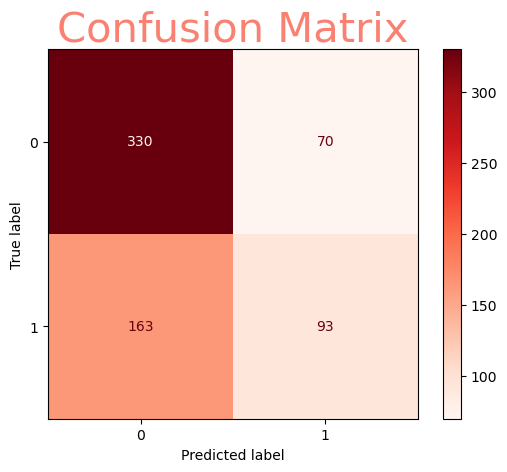

In [227]:
cm = confusion_matrix(y_test_unfiltered_scaled, y_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)

cm_display.plot(cmap=plt.cm.Reds)

plt.title('Confusion Matrix', fontsize=30, color='salmon')

plt.show()

### 6. Conclusion

##### - How is your prediction task defined? And what is the meaning of the output variable?

    We are predicting the water quality based on the water properties. A 0 represents bad water quality while 1 represents a good water quality

##### - Did you process the features in any way?

    The features underwent a few modifications like removing outliers, imputing missing data and scaling of the data

##### - How did you select which learning algorithms to use?

    The selection of learning algorithms were chosen based on what we learned in class and also by researching models to use for classification

##### - Did you try to tune the hyperparameters of the learning algorithm, and in that case how?

    I made sure to tune the hyperparameters of all models. I did that by first looking at what params each model has to offer and then search through the sklearn documentation and google to find out which parameters to tune

##### - How do you evaluate the quality of your system?

    I evaluate the quality of my system by using K-Fold validation through cross_val_score with k = 5. I set the scoring metric to f1_weighted. 
        
    The reason why is because there is a class imbalance in the dataset. 64% of the dataset has a target of 0. 
        
    Therefore, I cannot use accuracy as if a model were to predict 0 100% of the time, the model would be 64% accurate even though it is not trying to discriminate.

    I also cannot use the normal F1 score as there is a class imbalance and that would lead to having a model predicting little to none false negative while having too many true positives due to class imbalance.

    Therefore, f1_weighted is used as it takes into account the class imbalance and adjusts for it thereby giving an overall better model. 

    I also tested 4 scenarios of data namely, unfiltered unscaled, unfiltered scaled, filtered unscaled and filtered scaled. The data which gave the highest F1 score is unfiltered scaled.

##### - How well does your system compare to a dummy baseline?

    The model which has the highest f1 score is higher than the dummy baseline by 23.2%
    
##### - Is it possible to say something about which features the model considers important? (Whether this is possible depends on the type of classifier you are using)

    As I am using SVC, it would not be possible to do so